In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.io import wavfile
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
import random
import itertools
import librosa
import librosa.display
import IPython.display as ipd
from os.path import isdir, join
import tensorflow.keras as keras

In [84]:
print(os.listdir("./datasets/"))

['test', 'train']


In [85]:
train_path = "./datasets/train/audio/"
print(os.listdir(train_path))

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero', '_background_noise_']


In [86]:
dirs = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
dirs.sort()
print(dirs)

['_background_noise_', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


In [87]:
target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
unknown_list = [d for d in dirs if d not in target_list and d != '_background_noise_' ]
print('target_list : ',end='')
print(target_list)
print('unknowns_list : ', end='')
print(unknown_list)

target_list : ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
unknowns_list : ['bed', 'bird', 'cat', 'dog', 'eight', 'five', 'four', 'happy', 'house', 'marvin', 'nine', 'one', 'seven', 'sheila', 'six', 'three', 'tree', 'two', 'wow', 'zero']


# noise는 원본 데이터로 모델 돌려본 뒤 사용하여보자

In [7]:
background = [f for f in os.listdir(join(train_path, '_background_noise_')) if f.endswith('.wav')]
background_noise = []
for wav in background : 
    samples, sample_rate = librosa.load(join(join(train_path,'_background_noise_'),wav))
    samples = librosa.resample(samples, sample_rate, 8000)
    background_noise.append(samples)

In [8]:
all_wav = []
unknown_wav = []
label_all = []
i=0
label_value={}
for direct in dirs[1:]:
    waves = [f for f in os.listdir(join(train_path, direct)) if f.endswith('.wav')]
    label_value[direct] = i
    i = i + 1
###### 그래도 갖다 붙인거긴한데 이러면 숫자가 하나씩 어긋나게 보는건데 뭔가 의미가 있겠지?
    print(str(i)+":" +str(direct) + " ", end="")
    for wav in waves:
        samples, sample_rate = librosa.load(join(join(train_path,direct),wav), sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if len(samples) != 8000 : 
            continue
            
        if direct in unknown_list:
            unknown_wav.append(samples)
        else:
            label_all.append(direct)
            all_wav.append([samples, direct])

1:bed 2:bird 3:cat 4:dog 5:down 6:eight 7:five 8:four 9:go 10:happy 11:house 12:left 13:marvin 14:nine 15:no 16:off 17:on 18:one 19:right 20:seven 21:sheila 22:six 23:stop 24:three 25:tree 26:two 27:up 28:wow 29:yes 30:zero 

In [9]:
print(len(label_all), len(all_wav))

21312 21312


In [10]:
label_all[0]

'down'

In [11]:
all_wav[0]

[array([-1.27418665e-04, -1.12644804e-04, -1.86756923e-04, ...,
        -1.62762426e-05, -4.93293861e-04, -3.55132594e-04], dtype=float32),
 'down']

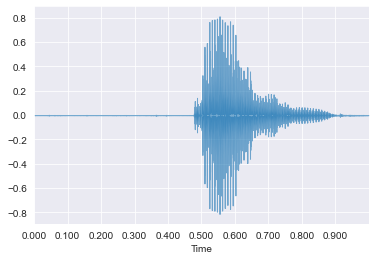

In [12]:
librosa.display.waveplot(*np.array(all_wav[0][:-1]), 8000, alpha=0.6)

In [13]:
wav_all = np.reshape(np.delete(all_wav,1,1),(len(all_wav)))
label_all = [i for i in np.delete(all_wav,0,1).tolist()]

C:\Users\hjhhi\anaconda3\envs\python3.6.8\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [14]:
### 리스트 언패킹
wav_vals = np.array([x for x in wav_all])
label_vals = [x for x in label_all]

In [15]:
print(wav_all.shape, wav_vals.shape)

(21312,) (21312, 8000)


In [16]:
len(label_vals)

21312

In [17]:
X_train, X_test, y_train, y_test = train_test_split(wav_vals, label_vals,
                                                    test_size=0.2,random_state=42, shuffle=True)

In [18]:
X_train = X_train.reshape(-1, 8000, 1)
X_test = X_test.reshape(-1, 8000, 1)

###  노이즈를 추가할시 아래 주석 활성화 시킬것

In [108]:
label_value = target_list
# label_value.append('unknown')
# label_value.append('silence')

In [109]:
label_value

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

In [90]:
new_label_value = dict()
for i, l in enumerate(label_value):
    new_label_value[l] = i
label_value = new_label_value

In [91]:
label_value

{'yes': 0,
 'no': 1,
 'up': 2,
 'down': 3,
 'left': 4,
 'right': 5,
 'on': 6,
 'off': 7,
 'stop': 8,
 'go': 9}

In [23]:
temp = []
for v in y_train:
    temp.append(label_value[v[0]])
y_train = np.array(temp)

temp = []
for v in y_test:
    temp.append(label_value[v[0]])
y_test = np.array(temp)

In [24]:
y_train = keras.utils.to_categorical(y_train, len(label_value))
y_test = keras.utils.to_categorical(y_test, len(label_value))

In [25]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [155]:
input_tensor = keras.layers.Input(shape=(X_train[0].shape))
x = keras.layers.Conv1D(8, 11, padding="valid", activation="relu", strides=1)(input_tensor)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Conv1D(16, 7, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Conv1D(32, 5, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Conv1D(64, 5, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Conv1D(128, 3, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation="relu")(x)

output_tensor = keras.layers.Dense(len(label_value), activation="softmax")(x)

model = keras.Model(input_tensor, output_tensor)

In [156]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr = 0.001),
             metrics=['accuracy'])

In [157]:
history = model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=64,
          epochs=20)

Train on 17049 samples, validate on 4263 samples
Epoch 1/20
17049/17049 [==============================] - 11s 642us/sample - loss: 2.1980 - accuracy: 0.1683 - val_loss: 2.2426 - val_accuracy: 0.1518
Epoch 2/20
17049/17049 [==============================] - 10s 572us/sample - loss: 1.7681 - accuracy: 0.3237 - val_loss: 1.8241 - val_accuracy: 0.2967
Epoch 3/20
17049/17049 [==============================] - 10s 572us/sample - loss: 1.5421 - accuracy: 0.4132 - val_loss: 1.6520 - val_accuracy: 0.4004
Epoch 4/20
17049/17049 [==============================] - 10s 572us/sample - loss: 1.4371 - accuracy: 0.4604 - val_loss: 1.4816 - val_accuracy: 0.4748
Epoch 5/20
17049/17049 [==============================] - 10s 573us/sample - loss: 1.3527 - accuracy: 0.5018 - val_loss: 1.3977 - val_accuracy: 0.5081
Epoch 6/20
17049/17049 [==============================] - 10s 573us/sample - loss: 1.2907 - accuracy: 0.5287 - val_loss: 1.4344 - val_accuracy: 0.5027
Epoch 7/20
17049/17049 [=====================

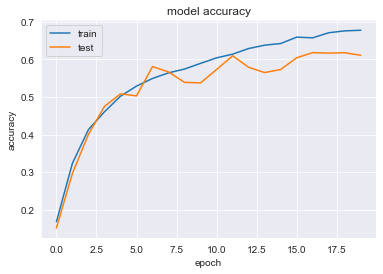

In [158]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 아무 기법 안 사용하면 당연히...

In [159]:
input_tensor = keras.layers.Input(shape=(X_train[0].shape))
x = keras.layers.Conv1D(8, 11, padding="valid", activation="relu", strides=1)(input_tensor)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(16, 7, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(32, 5, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(64, 5, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(128, 3, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="relu")(x)

output_tensor = keras.layers.Dense(len(label_value), activation="softmax")(x)

batch_model = keras.Model(input_tensor, output_tensor)

In [160]:
batch_model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr = 0.001),
             metrics=['accuracy'])
history = batch_model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=64,
          epochs=20)

Train on 17049 samples, validate on 4263 samples
Epoch 1/20
17049/17049 [==============================] - 16s 939us/sample - loss: 2.1925 - accuracy: 0.2065 - val_loss: 2.8154 - val_accuracy: 0.1142
Epoch 2/20
17049/17049 [==============================] - 13s 783us/sample - loss: 1.7009 - accuracy: 0.3626 - val_loss: 2.1316 - val_accuracy: 0.2250
Epoch 3/20
17049/17049 [==============================] - 14s 804us/sample - loss: 1.4028 - accuracy: 0.4949 - val_loss: 2.1300 - val_accuracy: 0.2824
Epoch 4/20
17049/17049 [==============================] - 14s 802us/sample - loss: 1.1832 - accuracy: 0.5817 - val_loss: 1.6725 - val_accuracy: 0.3784
Epoch 5/20
17049/17049 [==============================] - 14s 799us/sample - loss: 1.0388 - accuracy: 0.6411 - val_loss: 1.2731 - val_accuracy: 0.5543
Epoch 6/20
17049/17049 [==============================] - 13s 784us/sample - loss: 0.9396 - accuracy: 0.6715 - val_loss: 1.2724 - val_accuracy: 0.5480
Epoch 7/20
17049/17049 [=====================

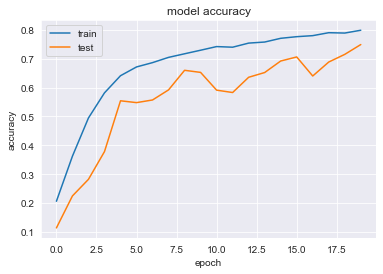

In [161]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [162]:
model.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 7990, 8)           96        
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 3995, 8)           0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 3995, 8)           0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 3989, 16)          912       
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 1994, 16)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 1994, 16)          0  

In [28]:
input_tensor = keras.layers.Input(shape=(X_train[0].shape))
x = keras.layers.Conv1D(8, 11, padding="valid", activation="relu", strides=1)(input_tensor)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(16, 7, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(32, 5, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(64, 5, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(128, 3, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.GRU(128, return_sequences=True)(x)
x = keras.layers.GRU(64, return_sequences=True)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="relu")(x)

output_tensor = keras.layers.Dense(len(label_value), activation="softmax")(x)

batch_model = keras.Model(input_tensor, output_tensor)

In [29]:
batch_model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr = 0.001),
             metrics=['accuracy'])
history = batch_model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=64,
          epochs=20)

Train on 17049 samples, validate on 4263 samples
Epoch 1/20
17049/17049 [==============================] - 25s 1ms/sample - loss: 1.9888 - accuracy: 0.2760 - val_loss: 2.6686 - val_accuracy: 0.1354
Epoch 2/20
17049/17049 [==============================] - 18s 1ms/sample - loss: 1.3685 - accuracy: 0.5023 - val_loss: 1.8876 - val_accuracy: 0.3148
Epoch 3/20
17049/17049 [==============================] - 18s 1ms/sample - loss: 0.9761 - accuracy: 0.6539 - val_loss: 1.1308 - val_accuracy: 0.5939
Epoch 4/20
17049/17049 [==============================] - 18s 1ms/sample - loss: 0.7138 - accuracy: 0.7544 - val_loss: 0.9012 - val_accuracy: 0.6941
Epoch 5/20
17049/17049 [==============================] - 18s 1ms/sample - loss: 0.5975 - accuracy: 0.7973 - val_loss: 0.8637 - val_accuracy: 0.6983
Epoch 6/20
17049/17049 [==============================] - 18s 1ms/sample - loss: 0.5303 - accuracy: 0.8191 - val_loss: 1.0200 - val_accuracy: 0.6596
Epoch 7/20
17049/17049 [==============================] -

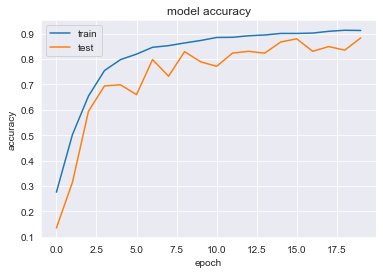

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [166]:
input_tensor = keras.layers.Input(shape=(X_train[0].shape))
x = keras.layers.Conv1D(8, 11, padding="valid", activation="relu", strides=1)(input_tensor)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(16, 7, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(32, 5, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(64, 5, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv1D(128, 3, padding='valid', activation='relu', strides=1)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.GRU(128, return_sequences=True)(x)
x = keras.layers.GRU(128, return_sequences=True)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="relu")(x)

output_tensor = keras.layers.Dense(len(label_value), activation="softmax")(x)

batch_model = keras.Model(input_tensor, output_tensor)

In [167]:
batch_model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr = 0.001),
             metrics=['accuracy'])
history = batch_model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=64,
          epochs=20)

Train on 17049 samples, validate on 4263 samples
Epoch 1/20
17049/17049 [==============================] - 25s 1ms/sample - loss: 2.0223 - accuracy: 0.2639 - val_loss: 2.3764 - val_accuracy: 0.1377
Epoch 2/20
17049/17049 [==============================] - 20s 1ms/sample - loss: 1.2998 - accuracy: 0.5292 - val_loss: 2.7256 - val_accuracy: 0.1898
Epoch 3/20
17049/17049 [==============================] - 20s 1ms/sample - loss: 0.8964 - accuracy: 0.6836 - val_loss: 1.1243 - val_accuracy: 0.6120
Epoch 4/20
17049/17049 [==============================] - 20s 1ms/sample - loss: 0.6906 - accuracy: 0.7632 - val_loss: 0.9478 - val_accuracy: 0.6627
Epoch 5/20
17049/17049 [==============================] - 20s 1ms/sample - loss: 0.5866 - accuracy: 0.7996 - val_loss: 1.3466 - val_accuracy: 0.5724
Epoch 6/20
17049/17049 [==============================] - 20s 1ms/sample - loss: 0.5178 - accuracy: 0.8255 - val_loss: 0.9271 - val_accuracy: 0.6782
Epoch 7/20
17049/17049 [==============================] -

In [31]:
test_wav=[]
test_wav_list = [f for f in os.listdir("./datasets/test/audio/") if f.endswith('.wav')]
for wav in test_wav_list: 
    samples, sample_rate = librosa.load(join("./datasets/test/audio/",wav), sr = 16000)
    samples = librosa.resample(samples, sample_rate, 8000)
    if len(samples) != 8000 : 
        continue 
    else:
        test_wav.append([samples])

In [42]:
test_wav

[[array([ 0.00210967,  0.0047405 ,  0.00439511, ..., -0.00553609,
         -0.00664157, -0.0070809 ], dtype=float32)],
 [array([0.00027661, 0.00234994, 0.00222845, ..., 0.00048842, 0.00062372,
         0.00069278], dtype=float32)],
 [array([-3.6465372e-05,  9.0698290e-05,  8.1210615e-05, ...,
         -1.9326575e-05,  1.3440718e-04,  1.6186092e-04], dtype=float32)],
 [array([ 0.00068315,  0.00275883,  0.00232842, ..., -0.00403706,
         -0.00445315, -0.00405225], dtype=float32)],
 [array([-0.00176492, -0.00337074, -0.00384646, ...,  0.00751262,
          0.006905  ,  0.00584062], dtype=float32)],
 [array([-1.47658366e-05, -3.52062307e-05, -5.12831284e-05, ...,
          6.78496581e-05,  7.37749360e-05,  1.05489984e-04], dtype=float32)],
 [array([ 1.8604402e-05,  9.9399447e-05, -2.2811859e-04, ...,
         -3.6421695e-04, -3.4367738e-04, -4.5973069e-05], dtype=float32)],
 [array([-0.00055144, -0.00063108, -0.00070897, ...,  0.0005842 ,
          0.00038081,  0.00067597], dtype=float

In [43]:
test_wav = np.array(test_wav)

In [46]:
test_wav = test_wav.reshape(158538, 8000, 1)

In [48]:
test_wav.shape

(158538, 8000, 1)

In [39]:
batch_model.save("1dcnn.h5")

In [50]:
model = keras.models.load_model('./1dcnn.h5')

In [52]:
subscript = model.predict(test_wav)

In [65]:
subscript.shape

(158538, 10)

In [74]:
submit = np.argmax(subscript, axis=1)

In [77]:
submit = np.array(submit)

In [122]:
last_submit=[]
for i in range(len(submit)):
    last_submit.append(label_value[submit[i]])

In [92]:
label_value

{'yes': 0,
 'no': 1,
 'up': 2,
 'down': 3,
 'left': 4,
 'right': 5,
 'on': 6,
 'off': 7,
 'stop': 8,
 'go': 9}

In [111]:
label_value[0]

'yes'

In [113]:
len(submit)

158538

In [119]:
submit[1231]

3

In [123]:
last_submit

['no',
 'up',
 'go',
 'go',
 'right',
 'on',
 'on',
 'right',
 'go',
 'go',
 'off',
 'on',
 'up',
 'yes',
 'no',
 'stop',
 'left',
 'down',
 'go',
 'off',
 'yes',
 'yes',
 'right',
 'no',
 'right',
 'left',
 'stop',
 'off',
 'go',
 'down',
 'yes',
 'right',
 'stop',
 'stop',
 'down',
 'yes',
 'go',
 'yes',
 'go',
 'right',
 'on',
 'down',
 'no',
 'off',
 'on',
 'go',
 'yes',
 'no',
 'no',
 'off',
 'right',
 'go',
 'up',
 'go',
 'right',
 'down',
 'on',
 'up',
 'left',
 'up',
 'up',
 'stop',
 'stop',
 'up',
 'stop',
 'off',
 'off',
 'left',
 'go',
 'down',
 'stop',
 'right',
 'off',
 'right',
 'go',
 'right',
 'no',
 'left',
 'right',
 'on',
 'no',
 'stop',
 'off',
 'yes',
 'go',
 'down',
 'down',
 'yes',
 'off',
 'up',
 'on',
 'left',
 'left',
 'down',
 'off',
 'down',
 'go',
 'on',
 'go',
 'on',
 'up',
 'yes',
 'on',
 'down',
 'down',
 'up',
 'up',
 'stop',
 'no',
 'no',
 'stop',
 'down',
 'up',
 'yes',
 'on',
 'left',
 'stop',
 'go',
 'stop',
 'down',
 'no',
 'right',
 'yes',
 'go',


In [124]:
label_value[0]

'yes'

In [126]:
submit[1]

2

In [127]:
last_submit = pd.DataFrame(last_submit)

In [128]:
last_submit.to_csv("lastsubmit.csv")